In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

In [23]:
#loading the DataSet i
df = pd.read_csv("Boston.csv")
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [24]:
#Feature and target
x=df[['PRICE']]
y=df['TAX']
#splitting and training model
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=42)
model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [25]:
y_pred=model.predict(x_test)

In [26]:
# Model Performance Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [27]:

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 23811.59
R² Score: 0.24


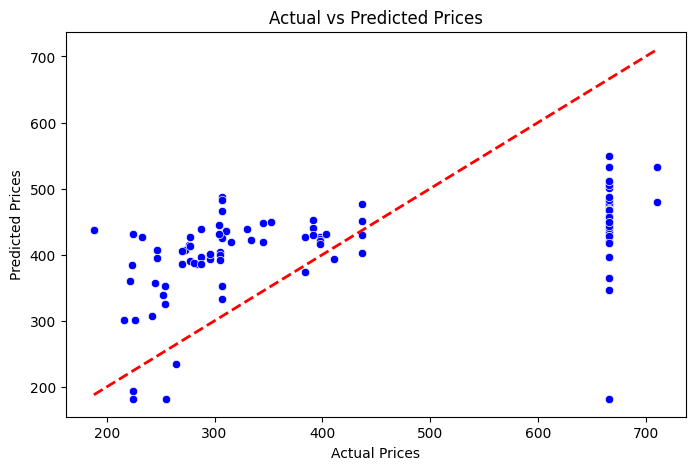

In [28]:
# Visualizing Predictions
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

DEcision tree

In [29]:
# Select features (X) and target (y)
X = df.drop(columns=["PRICE"]) 
y = df["PRICE"] 

In [30]:
#splitting the data set into training aand testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Use DecisionTreeRegressor for continuous targets
dtr_model = DecisionTreeRegressor(max_depth=3, random_state=42)
dtr_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [32]:
dtr_pred =dtr_model.predict(X_test)
dtr_pred

array([22.89949749, 22.89949749, 17.06184211, 22.89949749, 17.06184211,
       22.89949749, 17.06184211, 17.06184211, 22.89949749, 22.89949749,
       17.06184211, 17.06184211, 11.90344828, 22.89949749, 22.89949749,
       33.3       , 17.06184211, 11.90344828, 45.56      , 11.90344828,
       22.89949749, 22.89949749, 17.06184211, 22.89949749, 11.90344828,
       11.90344828, 22.89949749, 11.90344828, 17.06184211, 22.89949749,
       17.06184211, 22.89949749, 33.3       , 22.89949749, 17.06184211,
       17.06184211, 33.3       , 22.89949749, 17.06184211, 22.89949749,
       17.06184211, 22.89949749, 45.56      , 22.89949749, 22.89949749,
       11.90344828, 17.06184211, 22.89949749, 17.06184211, 22.89949749,
       22.89949749, 33.3       , 17.06184211, 22.89949749, 45.56      ,
       22.89949749, 17.06184211, 22.89949749, 22.89949749, 17.06184211,
       22.89949749, 33.3       , 22.89949749, 22.89949749, 22.89949749,
       17.06184211, 11.90344828, 22.89949749, 22.89949749, 17.06

In [33]:
# Make predictions using the trained model
dtr_pred = dtr_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, dtr_pred)
r2 = r2_score(y_test, dtr_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 16.77
R² Score: 0.77


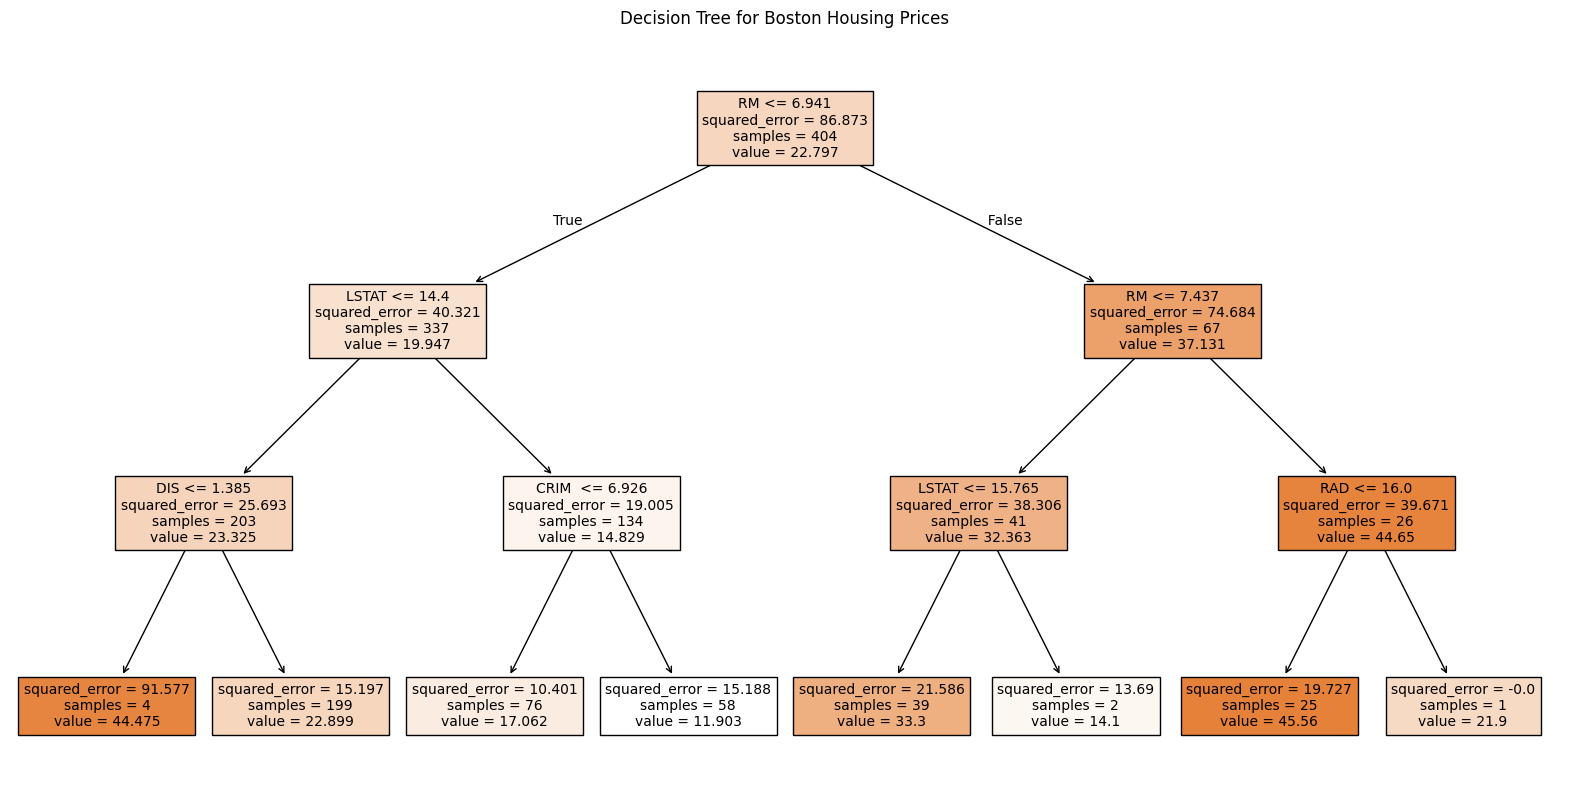

In [34]:
# Visualize the Decision Tree structure
plt.figure(figsize=(20,10))
plot_tree(dtr_model, filled=True, feature_names=X.columns, fontsize=10)
plt.title("Decision Tree for Boston Housing Prices")
plt.show()

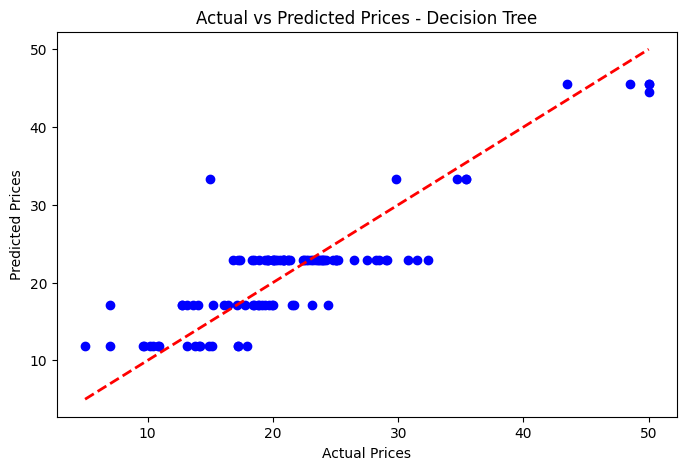

In [35]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, dtr_pred, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices - Decision Tree")
plt.show()

Random Forest

In [36]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [37]:
rf_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)

In [38]:
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 7.90
R² Score: 0.89


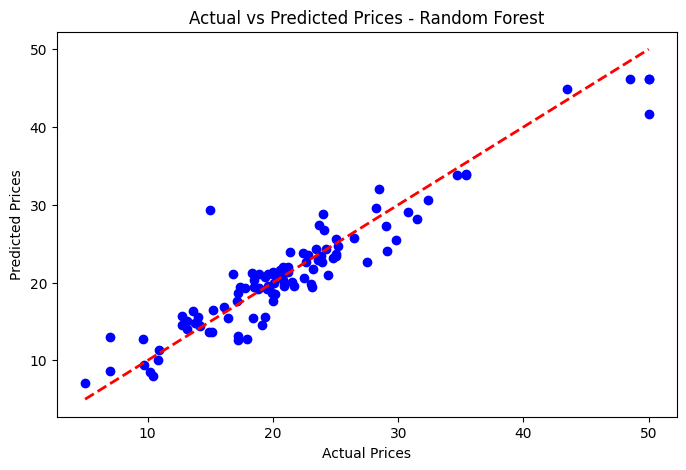

In [39]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, rf_pred, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices - Random Forest")
plt.show()

In [42]:
def model_evaluate(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    models ={
        'LinearRegression':LinearRegression(),
        'Decision Tree Regressor':DecisionTreeRegressor(),
        'Random Forest Regressor':RandomForestRegressor()
    }
    results={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        mse=mean_squared_error(y_test,y_pred)
        r2 =r2_score(y_test, y_pred)
        
        results[name]={
            'MSE':mse,
            'R Squared':r2
        }
    return results

In [43]:
model_evaluate(X,y)

{'LinearRegression': {'MSE': 24.291119474973538,
  'R Squared': 0.6687594935356317},
 'Decision Tree Regressor': {'MSE': 9.741470588235293,
  'R Squared': 0.8671625795312046},
 'Random Forest Regressor': {'MSE': 9.341322049019608,
  'R Squared': 0.8726191170500841}}

In [44]:
results= model_evaluate(X,y)
print(results)

{'LinearRegression': {'MSE': 24.291119474973538, 'R Squared': 0.6687594935356317}, 'Decision Tree Regressor': {'MSE': 24.03627450980392, 'R Squared': 0.6722346308350735}, 'Random Forest Regressor': {'MSE': 7.83198261764706, 'R Squared': 0.8932008921382835}}


In [45]:
results

{'LinearRegression': {'MSE': 24.291119474973538,
  'R Squared': 0.6687594935356317},
 'Decision Tree Regressor': {'MSE': 24.03627450980392,
  'R Squared': 0.6722346308350735},
 'Random Forest Regressor': {'MSE': 7.83198261764706,
  'R Squared': 0.8932008921382835}}